<a href="https://colab.research.google.com/github/gabrielutomo/dataset-music/blob/main/Top_YouTube_Music_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

#MEMBACA DATASET

In [ ]:
# Load dataset
data = pd.read_csv("/content/youtube-top-100-songs-2025.csv")

# Lihat 5 data pertama
display(data.head())

# Cek struktur data
data.info()


,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB


In [ ]:
# Import pandas
import pandas as pd

# Load dataset
data = pd.read_csv("/content/youtube-top-100-songs-2025.csv")

# Lihat 5 data pertama
display(data.head())

# Cek struktur data
data.info()

,title,fulltitle,description,view_count,categories,tags,duration,duration_string,live_status,thumbnail,channel,channel_url,channel_follower_count
0,ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT. (Official Music Video),ROSÉ & Bruno Mars - APT.\nDownload/stream: ht...,2009014557,Music,YG Entertainment;YG;와이지;K-pop;BLACKPINK;블랙핑크;블...,173,2:53,False,https://i.ytimg.com/vi_webp/ekr2nIex040/maxres...,ROSÉ,https://www.youtube.com/channel/UCBo1hnzxV9rz3...,19200000
1,"Lady Gaga, Bruno Mars - Die With A Smile (Offi...","Lady Gaga, Bruno Mars - Die With A Smile (Offi...",MAYHEM OUT NOW\nhttp://ladygaga.com \n \nListe...,1324833300,Music,Lady Gaga;Bruno Mars;Interscope;Pop,252,4:12,False,https://i.ytimg.com/vi/kPa7bsKwL-c/maxresdefau...,Lady Gaga,https://www.youtube.com/channel/UC07Kxew-cMIay...,29600000
2,Reneé Rapp - Leave Me Alone (Official Music Vi...,Reneé Rapp - Leave Me Alone (Official Music Vi...,"Listen to “BITE ME”, the new album from Reneé ...",2536628,Music,Reneé Rapp;Interscope Records;Pop,160,2:40,False,https://i.ytimg.com/vi/tiPWzFLiz4A/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000
3,Billie Eilish - BIRDS OF A FEATHER (Official M...,Billie Eilish - BIRDS OF A FEATHER (Official M...,Listen to HIT ME HARD AND SOFT: https://billie...,558329099,Music,Billie Eilish;Darkroom/Interscope Records;Alte...,231,3:51,False,https://i.ytimg.com/vi/V9PVRfjEBTI/maxresdefau...,Billie Eilish,https://www.youtube.com/channel/UCDGmojLIoWpXo...,56800000
4,Reneé Rapp - Mad (Official Music Video),Reneé Rapp - Mad (Official Music Video),"Listen to “BITE ME”, the new album from Reneé ...",2113548,Music,Reneé Rapp;Interscope Records;Pop,180,3:00,False,https://i.ytimg.com/vi/xkWQM3flsiY/maxresdefau...,Reneé Rapp,https://www.youtube.com/channel/UCZy4ki_L4bzw9...,408000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   title                   100 non-null    object
 1   fulltitle               100 non-null    object
 2   description             100 non-null    object
 3   view_count              100 non-null    int64 
 4   categories              100 non-null    object
 5   tags                    85 non-null     object
 6   duration                100 non-null    int64 
 7   duration_string         100 non-null    object
 8   live_status             100 non-null    bool  
 9   thumbnail               100 non-null    object
 10  channel                 100 non-null    object
 11  channel_url             100 non-null    object
 12  channel_follower_count  100 non-null    int64 
dtypes: bool(1), int64(3), object(9)
memory usage: 9.6+ KB


#CEK APAKAH ADA DATA YANG NULL DAN DUPLIKAT

In [ ]:
# Cek data kosong (null)
print("=== CEK DATA NULL ===")
print(data.isnull().sum())

# Cek duplikat
print("\nJumlah duplikat:", data.duplicated().sum())

# Hapus duplikat jika ada
data = data.drop_duplicates()


=== CEK DATA NULL ===
title                      0
fulltitle                  0
description                0
view_count                 0
categories                 0
tags                      15
duration                   0
duration_string            0
live_status                0
thumbnail                  0
channel                    0
channel_url                0
channel_follower_count     0
dtype: int64

Jumlah duplikat: 0


#MEMISAHKAN FITUR DAN LABEL

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Tentukan fitur dan label
X = data[['categories', 'duration', 'tags', 'channel']]
y = data['view_count']

# Encode label menjadi angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Cek hasil encoding
print("Contoh encoding:", list(zip(y[:5], y_encoded[:5])))

Contoh encoding: [(2009014557, np.int64(99)), (1324833300, np.int64(98)), (2536628, np.int64(17)), (558329099, np.int64(97)), (2113548, np.int64(16))]


#BALANCING DATA MENGGUNAKAN SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Cek distribusi sebelum SMOTE
print("=== Distribusi Sebelum Balancing ===")
print(pd.Series(y_encoded).value_counts())

# Handle missing values in 'tags'
X['tags'].fillna('', inplace=True)

# Encode categorical features
categorical_features = ['categories', 'tags', 'channel']
one_hot = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],
                                  remainder='passthrough')

X_encoded = transformer.fit_transform(X)


# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y_encoded)

# Cek distribusi setelah SMOTE
print("\n=== Distribusi Setelah SMOTE ===")
print(pd.Series(y_resampled).value_counts())

# Gabungkan results back into a DataFrame for potential later use (optional)
# Note: Due to one-hot encoding, column names will change.
# You might need to handle this based on your specific needs later.
# balanced_data = pd.DataFrame(X_resampled)
# balanced_data['view_count'] = le.inverse_transform(y_resampled)

# Saving to Excel might not be straightforward with the encoded data without proper column names.
# If needed, you would reconstruct the DataFrame with meaningful column names.
# output_path = "youtube_balanced_data.xlsx"
# balanced_data.to_excel(output_path, index=False)

=== Distribusi Sebelum Balancing ===
99    1
98    1
17    1
97    1
16    1
     ..
24    1
40    1
10    1
21    1
22    1
Name: count, Length: 100, dtype: int64

=== Distribusi Setelah SMOTE ===
99    1
98    1
17    1
97    1
16    1
     ..
24    1
40    1
10    1
21    1
22    1
Name: count, Length: 100, dtype: int64


/tmp/ipython-input-4005588552.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_copy['tags'].fillna('', inplace=True)


#NORMALISASI DAN SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur agar skala serupa
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_resampled)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)

Data training: (80, 145)
Data testing: (20, 145)


#TRAINING MODEL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Buat model Naive Bayes
model = GaussianNB()

# Latih model
# Convert sparse matrix to dense array
model.fit(X_train.toarray(), y_train)

print("Model berhasil dilatih ✅")

Model berhasil dilatih ✅


#EVALUASI MODEL

=== HASIL EVALUASI ===
Akurasi: 0.00%

Classification Report:
               precision    recall  f1-score   support

        6605       0.00      0.00      0.00       1.0
     1198540       0.00      0.00      0.00       1.0
     2113548       0.00      0.00      0.00       1.0
     2536628       0.00      0.00      0.00       0.0
    18154200       0.00      0.00      0.00       0.0
    18245315       0.00      0.00      0.00       0.0
    19166284       0.00      0.00      0.00       1.0
    20923612       0.00      0.00      0.00       1.0
    23070337       0.00      0.00      0.00       1.0
    24709753       0.00      0.00      0.00       1.0
    28007213       0.00      0.00      0.00       1.0
    36141339       0.00      0.00      0.00       1.0
    36173120       0.00      0.00      0.00       1.0
    40322577       0.00      0.00      0.00       0.0
    41075369       0.00      0.00      0.00       1.0
    44470482       0.00      0.00      0.00       0.0
    45822601      

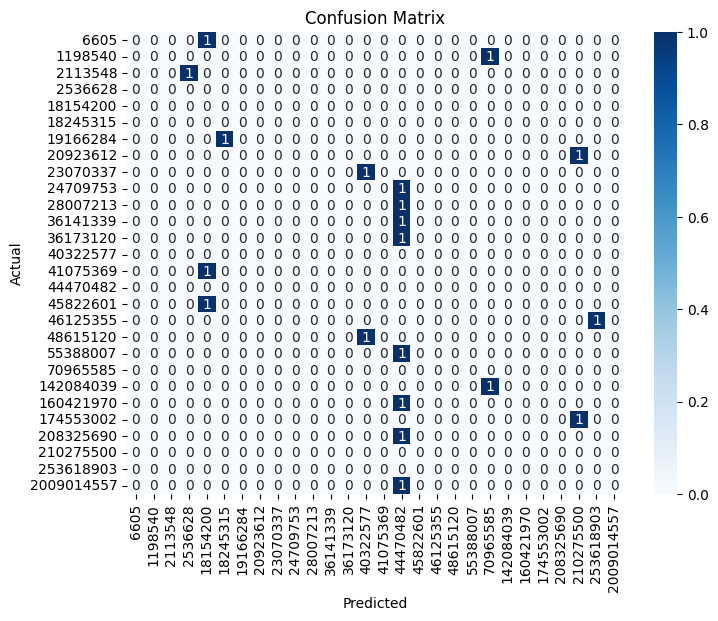

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for unique

# Prediksi data uji
y_pred = model.predict(X_test.toarray())

# Get unique labels from the test data and predictions
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Get the corresponding target names for the unique labels and convert to string
target_names_subset = le.inverse_transform(unique_labels).astype(str).tolist()


# Evaluasi hasil
print("=== HASIL EVALUASI ===")
print(f"Akurasi: {accuracy_score(y_test, y_pred)*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names_subset, zero_division=0))

# Confusion Matrix visual
cm = confusion_matrix(y_test, y_pred, labels=unique_labels)
plt.figure(figsize=(8, 6)) # Increase figure size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names_subset, yticklabels=target_names_subset)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#PREDIKSI MANUAL (INPUT DARI USER)

In [ ]:
import pandas as pd

# Input manual - ask for the correct features and handle types
categories_input = input("Masukkan kategori (contoh: Music): ")
duration_input = float(input("Masukkan durasi dalam detik (contoh: 173): "))
tags_input = input("Masukkan tags (pisahkan dengan semicolon, contoh: Pop;Rock): ")
channel_input = input("Masukkan nama channel (contoh: ROSÉ): ")


# Create a DataFrame with the same column names as the training data
input_df = pd.DataFrame([[categories_input, duration_input, tags_input, channel_input]],
                        columns=['categories', 'duration', 'tags', 'channel'])

# Apply the same preprocessing as used for the training data
# We need to use the fitted preprocessor and scaler
input_processed = preprocessor.transform(input_df)
input_scaled = scaler.transform(input_processed)


# Prediksi
pred = model.predict(input_scaled.toarray()) # Convert to dense array for GaussianNB
pred_label = le.inverse_transform(pred)

print(f"\nPrediksi View Count: {pred_label[0]}")

Masukkan kategori (contoh: Music): APT
Masukkan durasi dalam detik (contoh: 173): 253
Masukkan tags (pisahkan dengan semicolon, contoh: Pop;Rock): POP
Masukkan nama channel (contoh: ROSÉ): ROSE

Prediksi View Count: 253618903
